# Dataset Exploration


In [1]:
# importing libraries
import pandas as pd # Data Science essentials
import matplotlib.pyplot as plt # Data visualization essentials 
import seaborn as sns # Enhanced data visualization essentials 
import numpy as np # Mathemetical essentials 
import statsmodels.formula.api as smf # Regression modelling 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File name
file = 'Apprentice_Chef_Dataset2.xlsx'

## Reading the file into python 
app_chef = pd.read_excel(io = file)
#app_chef = app_chef_org.copy()


# Checking the first five rows of the dataset 
app_chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {app_chef.shape[0]}
Features:     {app_chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



## User Defined Function 

In [2]:
# Defining a function to standardize numerical variables in the dataset:
def standard(num_df):
    """
    This function standardizes a dataframe that contains variables which are either
    integers or floats.
    
    ------
    num_df : DataFrame, must contain only numerical variables
    
    """
    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()

    # FITTING the scaler with housing_data
    scaler.fit(num_df)

    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(num_df)

    # converting scaled data into a DataFrame
    x_scaled_df = pd.DataFrame(x_scaled)
    
    # adding labels to the scaled DataFrame
    x_scaled_df.columns = num_df.columns
    
    # Re-attaching target variable to DataFrame
    #X_scaled_df = X_scaled_df.join(target_variable)
    
    # returning the standardized data frame into the global environment
    return x_scaled_df





## User-Defined Functions   

# Defining function for boxplots 
def distributions(variable, data, y = None, hue = None, orient = 'h'):
    """
    This function can be used for continuous or count variables.

    PARAMETERS
    ----------
    variable : str, continuous or count variable
    data     : DataFrame
    y        : names of variables in data
    hue      : optional Inputs for plotting long-form data
    orient   : "h", optional
        Orientation of the plot (vertical or horizontal). This is usually
        inferred based on the type of the input variables, but it can be used
        to resolve ambiguitiy when both `x` and `y` are numeric or when
        plotting wide-form data.   
    """
    
    sns.boxplot(x = data[variable],  
                y = None,     # optional y-variable
             hue    = None,     # optional categorical feature
             orient = 'h')
    
    plt.xlabel(variable)
    plt.tight_layout()
    plt.show()

    

    
    

    
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img



########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Information About Each Variable

In [4]:
# INFOrmation about each variable
app_chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

##  Descriptive Statistics for Numeric Data 

In [5]:
# descriptive statistics for numeric data
app_chef.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


## Classifying Variables Based on Variable Types  

In [6]:
CONTINUOUS = ['REVENUE',
               'AVG_TIME_PER_SITE_VISIT',
                'CANCELLATIONS_BEFORE_NOON', 	
                'CANCELLATIONS_AFTER_NOON',
                'AVG_PREP_VID_TIME', 	
                'LARGEST_ORDER_SIZE',
                'AVG_CLICKS_PER_VISIT']


COUNT = ['TOTAL_MEALS_ORDERED',
            'UNIQUE_MEALS_PURCH',
            'CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED',
            'WEEKLY_PLAN',
            'EARLY_DELIVERIES', 	
            'LATE_DELIVERIES', 	
            'PC_LOGINS', 	
            'MOBILE_LOGINS',
            'MASTER_CLASSES_ATTENDED',
            'MEDIAN_MEAL_RATING',
            'TOTAL_PHOTOS_VIEWED']

CATEGORICAL = ['CROSS_SELL_SUCCESS',
                'MOBILE_NUMBER',
                'PACKAGE_LOCKER', 	
                'REFRIGERATED_LOCKER',
                'TASTES_AND_PREFERENCES']

## Encoding Categorical Data 

In [7]:
# printing columns
print(f"""
CROSS_SELL_SUCCESS
-------------------
{app_chef['CROSS_SELL_SUCCESS'].value_counts()}


MOBILE_NUMBER
-------------
{app_chef['MOBILE_NUMBER'].value_counts()}


PACKAGE_LOCKER
--------------
{app_chef['PACKAGE_LOCKER'].value_counts()}


REFRIGERATED_LOCKER
--------------
{app_chef['REFRIGERATED_LOCKER'].value_counts()}
""")


CROSS_SELL_SUCCESS
-------------------
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


MOBILE_NUMBER
-------------
1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64


PACKAGE_LOCKER
--------------
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64


REFRIGERATED_LOCKER
--------------
0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64



## Review of Missing Value Analysis and Imputation 

In [8]:
#Checking for missing values in the dataset 
app_chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In the dataset, FAMILY_NAME has the highest amount of missing values. Inputing any value would be inappropriate for this feature as some customers probably refused to put in their family name when ordering a meal.

## Flagging Missing Values 

In [9]:
# Flagging missing variables for FAMILY_NAME
# creating a copy of dataframe for safety measures
app_chef_m = app_chef.copy()

# creating a new column where 1 indicates that observation has a missing family name
app_chef_m['m_FAMILY_NAME'] = app_chef_m['FAMILY_NAME'].isnull().astype(int)


## Visualization 

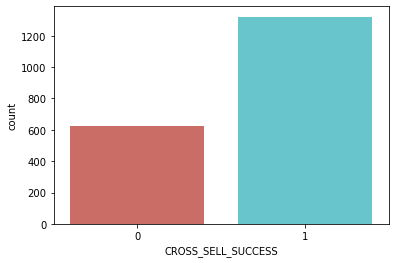

In [10]:
sns.countplot(x='CROSS_SELL_SUCCESS', data = app_chef, palette = 'hls')
plt.show()

In [11]:
# PERCENTAGE OF SUBSCRIPTION
count_no_sub = len(app_chef[app_chef['CROSS_SELL_SUCCESS']==0])

count_sub = len(app_chef[app_chef['CROSS_SELL_SUCCESS']==1])

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 32.11716341212744
percentage of subscription 67.88283658787256


Percentage of customers subscribing to the "Halfway There" is approximately 68% which is good for apprentice chef

### Visualization: Categorical Variables 

Text(0, 0.5, 'Frequency of Subscription')

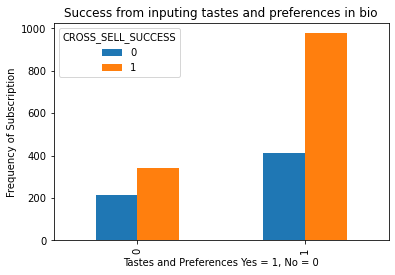

In [12]:
# Understanding if taste and preference will be a good predictor of the outcome  
pd.crosstab(app_chef.TASTES_AND_PREFERENCES, app_chef.CROSS_SELL_SUCCESS).plot(kind = 'bar')
plt.title('Success from inputing tastes and preferences in bio')
plt.xlabel('Tastes and Preferences Yes = 1, No = 0')
plt.ylabel('Frequency of Subscription')

From the diagram above, a customer having tastes or preferences in his/her bio may be a good predictor of the outcome


Text(0, 0.5, 'Frequency of Subscription')

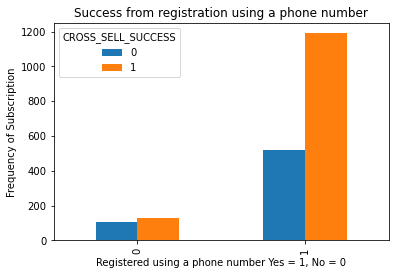

In [31]:
# Understanding if registering with a phone number will be a good predictor of the outcome  
pd.crosstab(app_chef.MOBILE_NUMBER, app_chef.CROSS_SELL_SUCCESS).plot(kind = 'bar')
plt.title('Success from registration using a phone number')
plt.xlabel('Registered using a phone number Yes = 1, No = 0')
plt.ylabel('Frequency of Subscription')

From the diagram above, registering with a phone number or not may be a good predictor of the outcome 

### Visualization: Continuous and Discrete Variables  

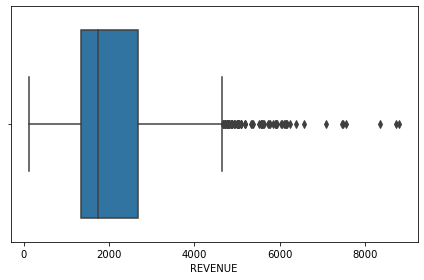

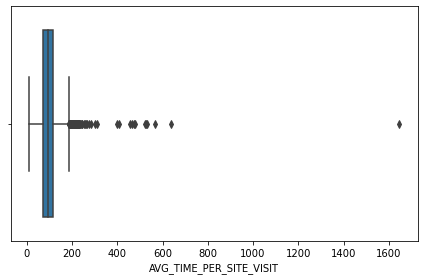

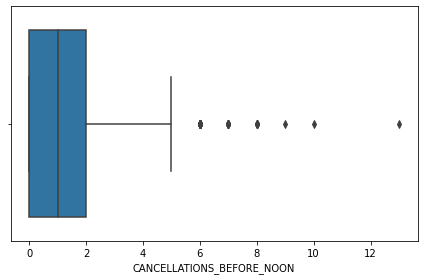

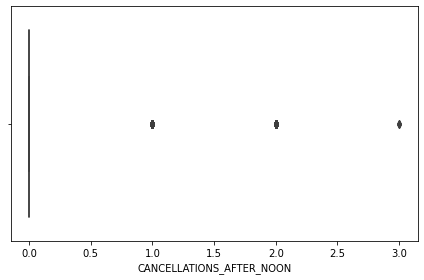

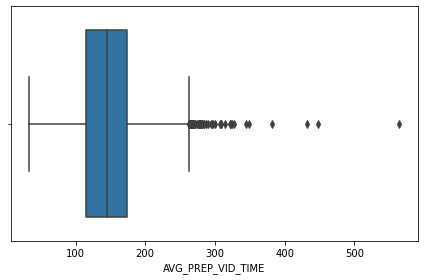

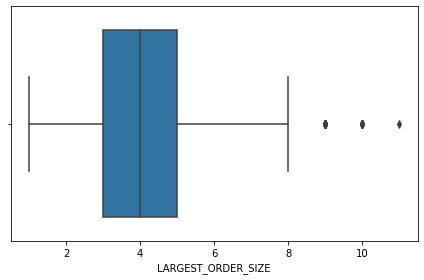

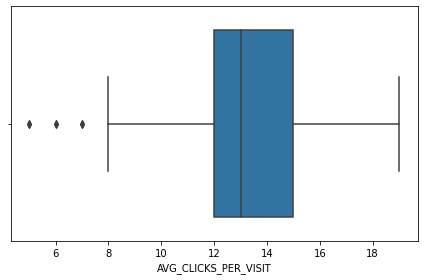

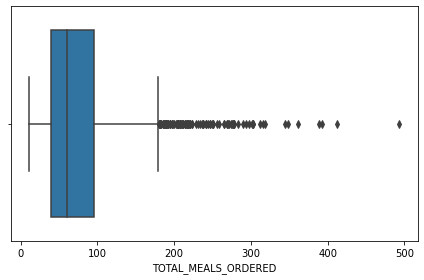

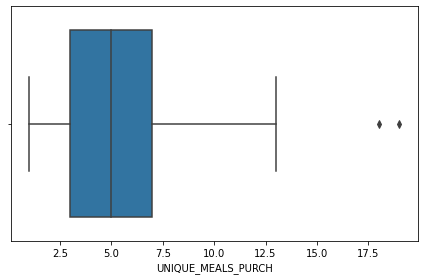

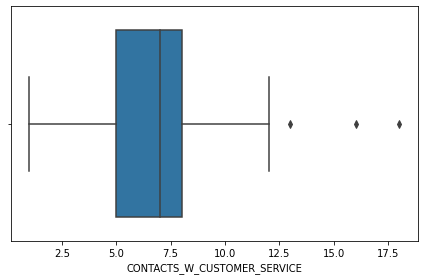

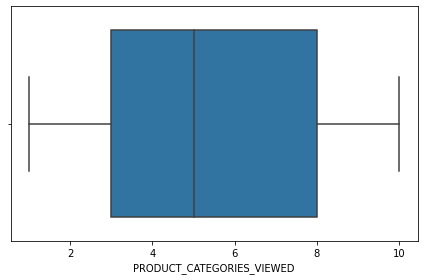

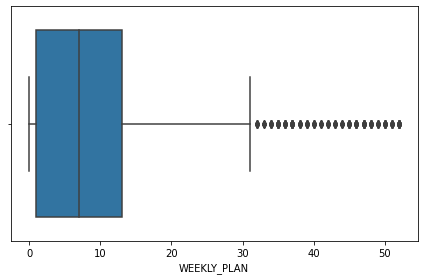

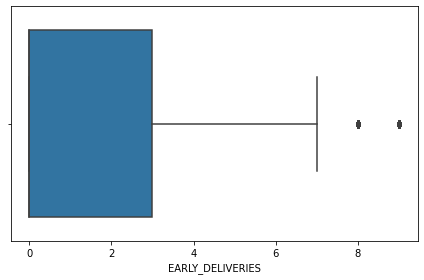

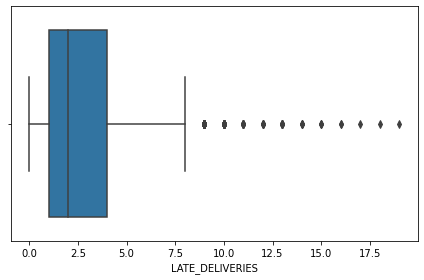

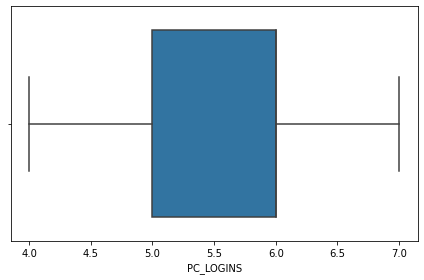

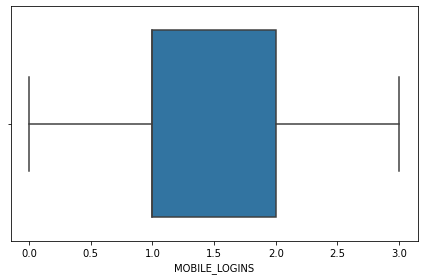

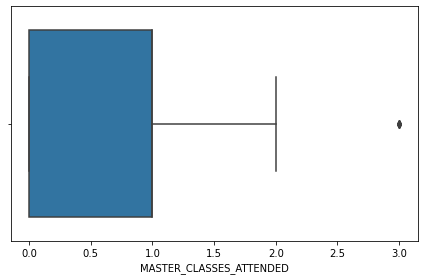

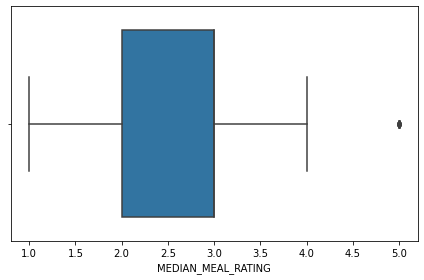

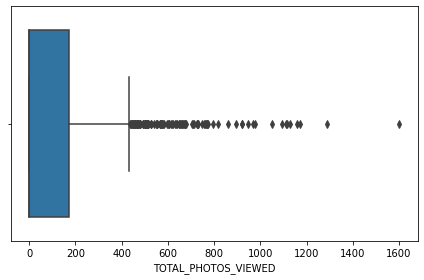

In [43]:
# Visualizing variable distributions
for variable in CONTINUOUS + COUNT:
    distributions(variable, app_chef_m, y = None, hue = None, orient = 'h' )

##  Feature Engineering 

### Anomaly Detection: Outliers  

In [13]:

app_chef['out_weekly_plans'] = 0
app_chef['out_avg_time_per_site_visit']=0
app_chef['out_cancellations_before_noon']=0
app_chef['out_cancellations_after_noon']=0
app_chef['out_cancellations_after_noon']=0
app_chef['out_avg_prep_vid_time']=0
app_chef['out_largest_order_size']=0
app_chef['out_total_meals_ordered']=0
app_chef['out_avg_clicks_per_visit']=0
app_chef['out_unique_meals_purchased']=0
app_chef['out_contacts_w_customer_service']=0
app_chef['out_early_deliveries']=0
app_chef['out_late_deliveries']=0
app_chef['out_master_classes_attended']=0
app_chef['out_median_meal_rating']=0
app_chef['out_total_photos_viewed']=0





for index, value in app_chef.iterrows():
    if app_chef.loc[index, 'WEEKLY_PLAN'] > 30:
        app_chef.loc[index, 'out_weekly_plans'] = 1
  

    # Avg_time_per_site_visit
    if app_chef.loc[index,'AVG_TIME_PER_SITE_VISIT'] > 200:
        app_chef.loc[index, 'out_avg_time_per_site_visit'] = 1
        
    #cancellations_before_noon
    if app_chef.loc[index,'CANCELLATIONS_BEFORE_NOON'] > 5:
        app_chef.loc[index, 'out_cancellations_before_noon'] = 1
        
    #cancellations_after_noon
    if app_chef.loc[index,'CANCELLATIONS_AFTER_NOON'] > 2:
        app_chef.loc[index, 'out_cancellations_after_noon'] = 1
     
    #avg_prep_vid_time
    if app_chef.loc[index,'AVG_PREP_VID_TIME'] > 250:
        app_chef.loc[index, 'out_avg_prep_vid_time'] = 1
     
    #largest_order_size
    if app_chef.loc[index,'LARGEST_ORDER_SIZE'] > 8:
        app_chef.loc[index, 'out_largest_order_size'] = 1
        
        
    #total_meals_ordered
    if app_chef.loc[index,'TOTAL_MEALS_ORDERED'] > 195:
        app_chef.loc[index, 'out_total_meals_ordered'] = 1
        
        
    #avg_clicks_per_visit
    if app_chef.loc[index,'AVG_CLICKS_PER_VISIT'] < 8:
        app_chef.loc[index, 'out_avg_clicks_per_visit'] = 1   

        
    #unique_meals_purchased   
    if app_chef.loc[index,'UNIQUE_MEALS_PURCH'] > 13:
        app_chef.loc[index, 'out_unique_meals_purchased'] = 1   
        
    #contacts_w_customer_service
    if app_chef.loc[index,'CONTACTS_W_CUSTOMER_SERVICE'] > 12:
        app_chef.loc[index, 'out_contacts_w_customer_service'] = 1 
        
    
    #early_deliveries   
    if app_chef.loc[index,'EARLY_DELIVERIES'] > 7:
        app_chef.loc[index, 'out_early_deliveries'] = 1 
            
            
    #late_deliveries
    if app_chef.loc[index,'LATE_DELIVERIES'] > 8:
        app_chef.loc[index, 'out_late_deliveries'] = 1 
        
        
    #master_classes_attended
    if app_chef.loc[index,'MASTER_CLASSES_ATTENDED'] > 2:
        app_chef.loc[index, 'out_master_classes_attended'] = 1 
        
        
    #median_meal_rating
    if app_chef.loc[index,'MEDIAN_MEAL_RATING'] > 4:
        app_chef.loc[index, 'out_median_meal_rating'] = 1 
        
    #total_photos_viewed   
    if app_chef.loc[index,'TOTAL_PHOTOS_VIEWED'] > 400:
        app_chef.loc[index, 'out_total_photos_viewed'] = 1  
      
    
    



###  Categorical variables: Email domain 

In [14]:
#Categorical variables: Email domains 
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in app_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = app_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df



# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
app_chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = [ '0' , 'EMAIL_DOMAIN' ]


# concatenating personal_email_domain with friends DataFrame
app_chef = pd.concat([  app_chef, email_df['EMAIL_DOMAIN']  ],
                   axis = 1)


# printing value counts of personal_email_domain
app_chef.loc[ : ,'EMAIL_DOMAIN'].value_counts()


#Aggregating the email domains into personal and professional and junk groups
# email domain types
professional_email_domains = ['@mmm.com', '@amex.com',
                              '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com',
                              '@cisco.com', '@cocacola.com', 
                              '@disney.com', '@dupont.com',
                              '@exxon.com', '@ge.org',
                              '@goldmansacs.com', '@homedepot.com',
                              '@ibm.com','@intel.com',
                              '@jnj.com', '@jpmorgan.com',
                              '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com',
                              '@pfizer.com', '@pg.com',
                              '@travelers.com', '@unitedtech.com',
                              '@unitedhealth.com', '@verizon.com',
                              '@visa.com', '@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com',
                      '@hotmail.com', '@live.com',
                      '@msn.com', '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in app_chef['EMAIL_DOMAIN']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('PROFESSIONAL')
            
        elif '@' + domain in personal_email_domains:
                placeholder_lst.append('PERSONAL')
            
        elif '@' + domain in junk_email_domains:
                placeholder_lst.append('JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
app_chef['email_domain_group'] = pd.Series(placeholder_lst)


# checking results
app_chef['email_domain_group'].value_counts()






PERSONAL        861
PROFESSIONAL    696
JUNK            389
Name: email_domain_group, dtype: int64

### Visualization: Email domain group

Text(0, 0.5, 'Frequency of Subscription')

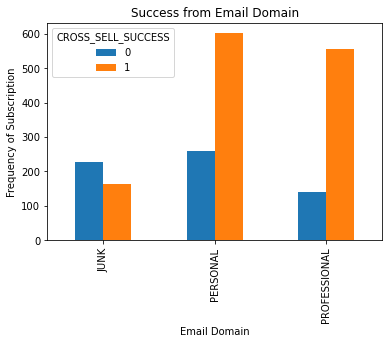

In [18]:
# Understanding if email domain group will be a good predictor of the outcome  
pd.crosstab(app_chef.email_domain_group, app_chef.CROSS_SELL_SUCCESS).plot(kind = 'bar')
plt.title('Success from Email Domain')
plt.xlabel('Email Domain')
plt.ylabel('Frequency of Subscription')


From the diagram above, email domain groups may be a good predictor of the outcome 

In [15]:
# STEP3: One-Hot Encoding
one_hot_email_domain = pd.get_dummies(app_chef['email_domain_group'])

# dropping original columns and keeping the encoded ones 
app_chef = app_chef.drop(['email_domain_group','EMAIL',
                                  'EMAIL_DOMAIN'], axis = 1)


# Adding encoded columns to dataset 
app_chef = app_chef.join(one_hot_email_domain)

# Just checking
app_chef.head(n = 6)

,REVENUE,CROSS_SELL_SUCCESS,NAME,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,JUNK,PERSONAL,PROFESSIONAL
0,393.0,1,Saathos,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,0,0,1
1,1365.0,1,Alysanne Osgrey,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,0,0,1
2,800.0,1,Edwyd Fossoway,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,0,0,1
3,600.0,1,Eleyna Westerling,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,0,0,1
4,1490.0,1,Elyn Norridge,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,0,0,1
5,1550.0,1,Genna Lannister,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0,0,1,0


###  Creating Dummies 

In [16]:
# Dummy variable for cancellations and locker 
app_chef['has_cancelled'] = 0
app_chef['has_locker'] = 0


for index, value in app_chef.iterrows():
    # Cancellations before noon 
    if app_chef.loc [index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        app_chef.loc [index, 'has_cancelled'] = 1
   
    # Cancellations after noon
    if app_chef.loc [index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        app_chef.loc [index, 'has_cancelled'] = 1
    
    # Package locker
    if app_chef.loc [index, 'PACKAGE_LOCKER'] > 0:
        app_chef.loc [index, 'has_locker'] = 1
        
    # Refrigerated locker 
    if app_chef.loc [index, 'REFRIGERATED_LOCKER'] > 0:
        app_chef.loc [index, 'has_locker'] = 1
    
    

# Just checking 
app_chef[['has_cancelled', 'has_locker']].head()

,has_cancelled,has_locker
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0


Text(0, 0.5, 'Frequency of Subscription')

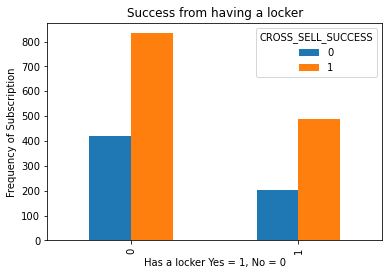

In [41]:
# Understanding if registering with a phone number will be a good predictor of the outcome  
pd.crosstab(app_chef.has_locker , app_chef.CROSS_SELL_SUCCESS).plot(kind = 'bar')
plt.title('Success from having a locker')
plt.xlabel('Has a locker Yes = 1, No = 0')
plt.ylabel('Frequency of Subscription')
#PACKAGE_LOCKER                  
#REFRIGERATED_LOCKER 

From the diagram above, having a locker or not may be a good predictor of the outcome 

Text(0, 0.5, 'Frequency of Subscription')

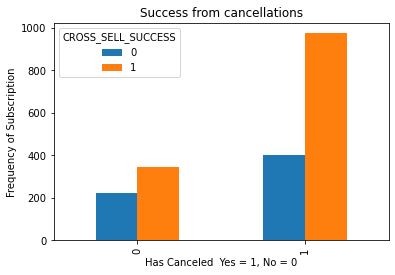

In [44]:
# Understanding if registering with a phone number will be a good predictor of the outcome  
pd.crosstab(app_chef.has_cancelled , app_chef.CROSS_SELL_SUCCESS).plot(kind = 'bar')
plt.title('Success from cancellations')
plt.xlabel('Has Canceled  Yes = 1, No = 0')
plt.ylabel('Frequency of Subscription')
# Cancellations before noon                  
# Cancellations after noon

From the diagram above, having an order canceled or not may be a good predictor of the outcome

#### On Total Meals Purchased  

In [17]:
# Average spending per customer 
app_chef['av_spending'] = (app_chef['REVENUE']
                           /app_chef['TOTAL_MEALS_ORDERED']).round()

#### On Unique Meals Purchased  

In [18]:
# Average spending per customer
app_chef['av_spending_unique'] = (app_chef['REVENUE']/
                           app_chef['UNIQUE_MEALS_PURCH']).round()

## Corelation Analysis  

In [19]:
# Pearson Correlation between the response variable (cross_sell_success) and the explanatory variables 
df_corr = app_chef.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
PROFESSIONAL                   0.19
CANCELLATIONS_BEFORE_NOON      0.16
has_cancelled                  0.10
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
PERSONAL                       0.04
MASTER_CLASSES_ATTENDED        0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
has_locker                     0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE             0.02
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
TOTAL_MEALS_ORDERED            0.01
LATE_DELIVERIES                0.01
REVENUE                        0.00
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
WEEKLY_PLAN                   -0.01
av_spending                   -0.02
av_spending_unique            -0.02
AVG_CLICKS_PER_VISIT        

# Model Building: Logistic Regression 

### In Statsmodels 

In [20]:
# Preparing Explanatory and Response Data

# declaring response variable
app_chef_target = app_chef.loc[ : , 'CROSS_SELL_SUCCESS']

# dropping REVENUE, NAME, FIRST_NAME, FAMILY_NAME and EMAIL from the explanatory variable set
app_chef_data = app_chef.drop(['CROSS_SELL_SUCCESS','NAME', 'FIRST_NAME',
                                                      'FAMILY_NAME'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in app_chef_data:
    print(val, '+')

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
JUNK +
PERSONAL +
PROFESSIONAL +
has_cancelled +
has_locker +
av_spending +
av_spending_unique +


In [21]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = app_chef_target)                   


# merging training data for statsmodels
app_chef_train = pd.concat([x_train, y_train], axis = 1)

In [22]:
# Just Checking 
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



#### Logistic Regression with Original Features and Engineered Features  

In [60]:
# instantiating a logistic regression model object
app_chef_logit = smf.logit(formula   = """CROSS_SELL_SUCCESS ~  REVENUE +
                                                                TOTAL_MEALS_ORDERED +
                                                                UNIQUE_MEALS_PURCH +
                                                                CONTACTS_W_CUSTOMER_SERVICE +
                                                                PRODUCT_CATEGORIES_VIEWED +
                                                                AVG_TIME_PER_SITE_VISIT +
                                                                MOBILE_NUMBER +
                                                                CANCELLATIONS_BEFORE_NOON +
                                                                CANCELLATIONS_AFTER_NOON +
                                                                TASTES_AND_PREFERENCES +
                                                                PC_LOGINS +
                                                                MOBILE_LOGINS +
                                                                EARLY_DELIVERIES +
                                                                LATE_DELIVERIES +
                                                                PACKAGE_LOCKER +
                                                                REFRIGERATED_LOCKER +
                                                                AVG_PREP_VID_TIME +
                                                                LARGEST_ORDER_SIZE +
                                                                MASTER_CLASSES_ATTENDED +
                                                                MEDIAN_MEAL_RATING +
                                                                AVG_CLICKS_PER_VISIT +
                                                                TOTAL_PHOTOS_VIEWED +
                                                                JUNK +
                                                                PERSONAL +
                                                                PROFESSIONAL +
                                                                has_cancelled +
                                                                has_locker +
                                                                Total_Cancellations +
                                                                av_spending +
                                                                av_spending_unique +
                                                                out_weekly_plans +
                                                                out_avg_time_per_site_visit +
                                                                out_cancellations_before_noon +
                                                                out_cancellations_after_noon +
                                                                out_avg_prep_vid_time +
                                                                out_largest_order_size +
                                                                out_total_meals_ordered +
                                                                out_avg_clicks_per_visit +
                                                                out_unique_meals_purchased +
                                                                out_contacts_w_customer_service +
                                                                out_early_deliveries +
                                                                out_late_deliveries +
                                                                out_master_classes_attended +
                                                                out_median_meal_rating +
                                                                out_total_photos_viewed""",
                           data = app_chef_train)


# FITTING the model object
results_logistic = app_chef_logit.fit()


# checking the results SUMMARY
print(results_logistic.summary())


         Current function value: 0.539625
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1416
Method:                           MLE   Df Model:                           42
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1407
Time:                        20:48:12   Log-Likelihood:                -787.31
converged:                      False   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 8.278e-33
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.8058      4.710     -0.383      0.701     -11.037       7.426
RE

C:\Users\Dennis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Logistic Regression with only Significant Features 

In [61]:
# instantiating a logistic regression model object
app_chef_logit = smf.logit(formula   = """CROSS_SELL_SUCCESS ~
                                                                MOBILE_NUMBER +
                                                                CANCELLATIONS_BEFORE_NOON +
                                                                TASTES_AND_PREFERENCES +
                                                                PC_LOGINS +
                                                                MASTER_CLASSES_ATTENDED +
                                                                PERSONAL +
                                                                PROFESSIONAL 
                                                                """,
                           data = app_chef_train)


# FITTING the model object
results_logistic = app_chef_logit.fit()


# checking the results SUMMARY
print(results_logistic.summary())


Optimization terminated successfully.
         Current function value: 0.558926
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1099
Time:                        20:48:23   Log-Likelihood:                -815.47
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.687e-40
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.1305      0.638     -4.907      0.000      -4.

In [62]:
# instantiating a logistic regression model object
app_chef_logit = smf.logit(formula   = """CROSS_SELL_SUCCESS ~ 
                                                                MOBILE_NUMBER +
                                                                CANCELLATIONS_BEFORE_NOON +
                                                                TASTES_AND_PREFERENCES +
                                                                PC_LOGINS +
                                                                MASTER_CLASSES_ATTENDED +
                                                                PERSONAL +
                                                                PROFESSIONAL +
                                                                out_avg_prep_vid_time +
                                                                out_total_meals_ordered +
                                                                out_early_deliveries +
                                                                out_master_classes_attended """,
                           data = app_chef_train)


# FITTING the model object
results_logistic = app_chef_logit.fit()


# checking the results SUMMARY
print(results_logistic.summary())


Optimization terminated successfully.
         Current function value: 0.551924
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           11
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1211
Time:                        20:48:26   Log-Likelihood:                -805.26
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.104e-41
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.2205      0.644     -5.005      0.000   

In [63]:
# instantiating a logistic regression model object
app_chef_logit = smf.logit(formula   = """CROSS_SELL_SUCCESS ~  
                                                                MOBILE_NUMBER +
                                                                CANCELLATIONS_BEFORE_NOON +
                                                                TASTES_AND_PREFERENCES +
                                                                PC_LOGINS +
                                                                PERSONAL +
                                                                PROFESSIONAL 
                                                                """,
                           data = app_chef_train)


# FITTING the model object
results_logistic = app_chef_logit.fit()


# checking the results SUMMARY
print(results_logistic.summary())


Optimization terminated successfully.
         Current function value: 0.560618
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1452
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1072
Time:                        20:48:27   Log-Likelihood:                -817.94
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.052e-39
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.0115      0.634     -4.754      0.000      -4.

### In scikit-learn 

In [23]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER',
                   'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES',
                   'LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
 

 # significant variables only (set 1)
 'logit_sig_1'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                     'PC_LOGINS','MASTER_CLASSES_ATTENDED','PERSONAL','PROFESSIONAL' ],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['MOBILE_NUMBER',  'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                   'PC_LOGINS', 'MASTER_CLASSES_ATTENDED', 'PERSONAL', 'PROFESSIONAL', 
                   'out_avg_prep_vid_time',  'out_total_meals_ordered', 'out_early_deliveries', 
                   'out_master_classes_attended'],

    
 # significant variables only (set 3)
 'logit_sig_3'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                      'PERSONAL','PROFESSIONAL']
    
}




#'logit_sig_1'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                    # 'PC_LOGINS', 'MASTER_CLASSES_ATTENDED','PERSONAL','PROFESSIONAL',
                    # 'out_avg_prep_vid_time', 'out_total_meals_ordered','out_early_deliveries',
                    # 'out_master_classes_attended' ],
    

In [24]:
# Dynamically printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_1']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}


Thrid Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_3']}

""")



/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


First Significant p-value Model:
--------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MASTER_CLASSES_ATTENDED', 'PERSONAL', 'PROFESSIONAL']


Second Significant p-value Model:
---------------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MASTER_CLASSES_ATTENDED'

In [80]:
# train/test split with the full model
app_chef_data   =  app_chef.loc[ : , candidate_dict['logit_sig_3']]
app_chef_target =  app_chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = app_chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)
# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# area under the roc curve (auc)
print('LogReg AUC:',roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


LogReg Training ACCURACY: 0.7258
LogReg Testing  ACCURACY: 0.7392
LogReg AUC: 0.6387


### Logistic Regression on Scaled Data  

In [2]:
###### Standardized Preparation 
# Standardizing our Data Set (only numeric variables) with user-defined function
chef_stand = standard(app_chef_data)

# Defining explanatory variables (add according to new feature selections)
app_chef_stand     = chef_stand.loc[: , candidate_dict['logit_sig_3']]

# train-test split with stratification
x_train_stand, x_test_stand, y_train_stand, y_test_stand = train_test_split(
            app_chef_stand,   # standerdized x variables 
            app_chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = app_chef_target) 

# merging training data for statsmodels
chef_train_stand = pd.concat([x_train_stand, x_train_stand], axis = 1)

# Important model on Standardized data
# INSTANTIATING a logistic regression model
logreg_stand = LogisticRegression(random_state = 219) 

# FITTING the training data
logreg_fit_stand = logreg_stand.fit(x_train_stand, y_train.values.reshape(-1,)) # removes warning on column shape

# PREDICTING based on the testing set
logreg_pred_stand = logreg_fit_stand.predict(x_test_stand)

# train accuracy
logreg_train_acc_stand  = logreg_fit_stand.score(x_train_stand, y_train_stand).round(4)

# test accuracy
logreg_test_acc_stand   = logreg_fit_stand.score(x_test_stand, y_test_stand).round(4)

# auc value
logreg_auc_stand = roc_auc_score(y_true  = y_test_stand,
                           y_score = logreg_pred_stand).round(4)

print('Training ACCURACY:', logreg_train_acc_stand)
print('Testing  ACCURACY:', logreg_test_acc_stand)
print('AUC Score        :', logreg_auc_stand)

NameError: name 'standard' is not defined

In [82]:
# zipping each feature name to its coefficient
logreg_model_values = zip(app_chef[candidate_dict['logit_sig_3']].columns,
                          logreg_fit_stand.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.65)
('MOBILE_NUMBER', 0.27)
('CANCELLATIONS_BEFORE_NOON', 0.42)
('TASTES_AND_PREFERENCES', 0.16)
('PERSONAL', 0.62)
('PROFESSIONAL', 0.86)


### Hyperparameter Tuning 

In [83]:
# train/test split with the logit_sig variables
app_chef_data   =  app_chef.loc[ :  , candidate_dict['logit_sig_3']]
app_chef_target =  app_chef.loc[ :  , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = app_chef_target)


In [71]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(app_chef_data, app_chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-71-e7fcb23c568c>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.6331


In [84]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.4000000000000001, max_iter=1000, random_state=219,
                   solver='sag')

In [85]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR TUNED Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR TUNED AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7258
LR TUNED Testing  ACCURACY: 0.7392
LR TUNED AUC Score        : 0.6387


In [86]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 27
True Positives : 304



# CART Model (Decision Tree) 

In [94]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7389
Full Tree Testing ACCURACY : 0.7433
Full Tree AUC Score: 0.6451


In [95]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc


Training ACCURACY: 0.7286
Testing  ACCURACY: 0.7331
AUC Score        : 0.6104


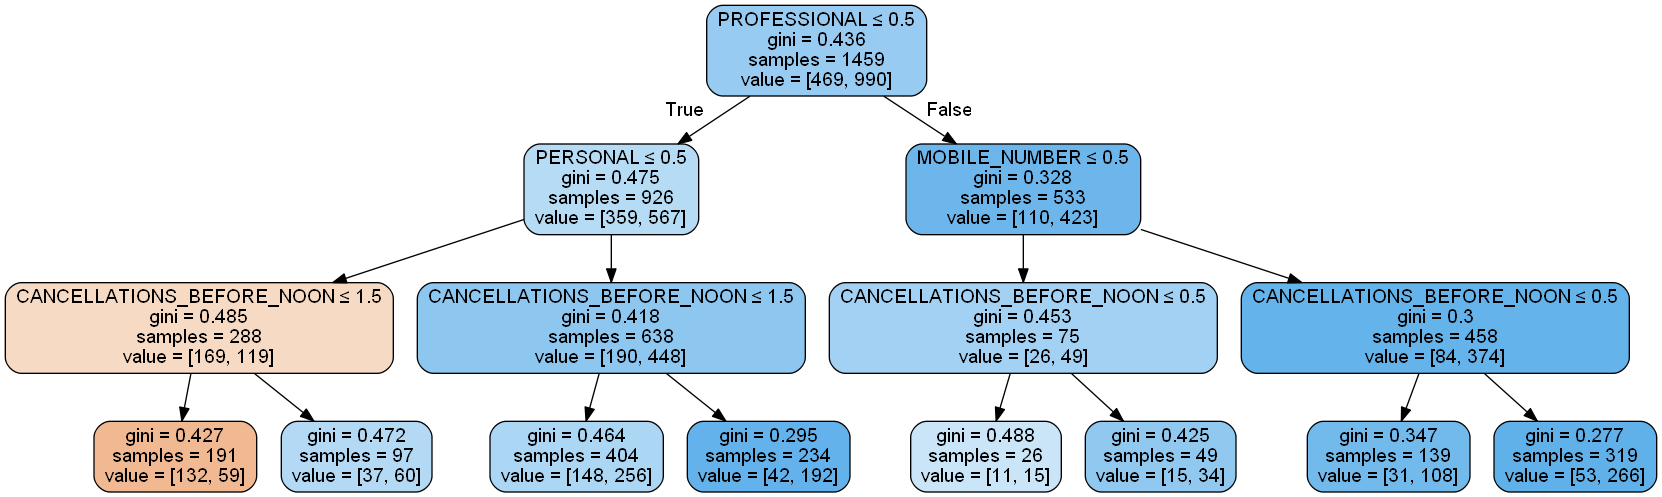

In [99]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-98-0e4e61b56a18>:135: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


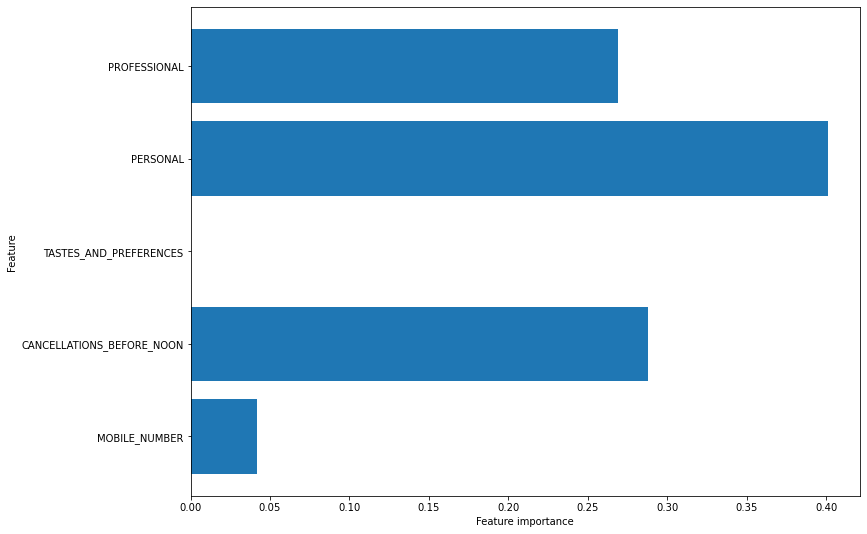

In [100]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

### Hyperparameter Tuning 

In [103]:
# Defining explanatory variables (add according to new feature selections)
app_chef_sig = app_chef.loc[: , candidate_dict['logit_sig_3']]

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            app_chef_sig,  # change
            app_chef_target,
            test_size = 0.25,
            random_state = 219,
            stratify = app_chef_target) # stratifying target variable to ensure balance

# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1) # contains target variable!

In [106]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(app_chef_sig, app_chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-106-1979a84860a7>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-106-1979a84860a7>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'gini'}
Tuned Training AUC: 0.6432


In [107]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7347
Testing  ACCURACY: 0.768
AUC Score        : 0.6717


In [108]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 63
False Positives: 93
False Negatives: 20
True Positives : 311



In [109]:
# comparing results
print(f"""
Model              AUC Score      TN, FP, FN, TP
-----               ---------      --------------
Tuned Logistic    {lr_tuned_auc}         {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Tuned Tree        {tree_tuned_auc}         {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Tuned Logistic',  'Tuned Tree'],
           
    'AUC Score'     : [lr_tuned_auc,  tree_tuned_auc],
    
    'Training Accuracy' : [lr_tuned_train_score, tree_tuned_train_score],
           
    'Testing Accuracy'  : [lr_tuned_test_score , tree_tuned_test_score],

    'Confusion Matrix'  : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                          (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/app_chef_classification_model_performance.xlsx',
                           index = False)


Model              AUC Score      TN, FP, FN, TP
-----               ---------      --------------
Tuned Logistic    0.6387         (56, 100, 27, 304)
Tuned Tree        0.6717         (63, 93, 20, 311)



# Final Model 

Based on the comparisons of the following models above, my final and most preferred model is the Decision Tree because it performed better than other models when exposed to new data. 

In [110]:
# comparing results
print(f"""
Model              AUC Score      TN, FP, FN, TP
-----               ---------      --------------
Tuned Tree        {tree_tuned_auc}         {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
""")

# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Tuned Tree'],
           
    'AUC Score'     : [tree_tuned_auc],
    
    'Training Accuracy' : [tree_tuned_train_score],
           
    'Testing Accuracy'  : [tree_tuned_test_score],

    'Confusion Matrix'  : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp)]
}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/final_app_chef_classification_model_performance.xlsx',
                           index = False)


Model              AUC Score      TN, FP, FN, TP
-----               ---------      --------------
Tuned Tree        0.6717         (63, 93, 20, 311)

